In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as sts
from scipy.stats import f_oneway
import numpy as np 
import scipy.stats as stats
from os import listdir
from os.path import isfile, join
import seaborn as sns
import re
from collections import Counter
from statistics import mean as mean 
!pip install liwc
import liwc
import pprint
from gensim.parsing.preprocessing import remove_stopwords
from os import path
from PIL import Image
from matplotlib.pyplot import figure
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from scipy import stats
from nltk.tokenize import word_tokenize
import scipy.stats as stats
nltk.download('punkt')



def tokenize(text):
    # you may want to use a smarter tokenizer
    for match in re.finditer(r'\w+', text, re.UNICODE):
        yield match.group(0)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
parse, category_names = liwc.load_token_parser('path_to_liwc_file')

In [ ]:
politifact = pd.read_csv("/content/drive/MyDrive/hate-fake-online-asonam/politifact.csv")
gossipcop = pd.read_csv("/content/drive/MyDrive/hate-fake-online-asonam/gossipcop.csv")
kaggle = pd.read_csv("/content/drive/MyDrive/hate-fake-online-asonam/kaggle_kdd_features.csv")
liar = pd.read_csv("/content/drive/MyDrive/hate-fake-online-asonam/liar_features.csv")
coaid = pd.read_csv("/content/drive/MyDrive/hate-fake-online-asonam/coaid_features.csv")
celebrity = pd.read_csv("/content/drive/MyDrive/hate-fake-online-asonam/celebrity.csv")
fakenews = pd.read_csv("/content/drive/MyDrive/hate-fake-online-asonam/fakenews.csv")

In [ ]:
#updating kaggle labels
dict_replace = {"1": "fake", "0":"real"}
kaggle["label"] = kaggle["label"].map(dict_replace)

#updating liar labels
dict_replace = {0: "fake", 3:"real"}
liar["label"] = liar["label"].map(dict_replace)

#updating coaid labels
dict_replace = {"Fake": "fake", "Real":"real"}
coaid["label"] = coaid["label"].map(dict_replace)

In [ ]:
from tqdm import tqdm
tqdm.pandas()

def clean_string(string):
    string = string.lower()
    string = remove_stopwords(string)
    return string

def return_liwc_count(string):
    tokens = tokenize(string)
    counts = Counter(category for token in tokens for category in parse(token))
    return dict(counts)

In [ ]:
liwc_classes = []
liwc_classes_dict = {'affect': [], 'posemo': [], 'cogproc': [], 'cause': [], 'drives': [], 'achiev': [], 'function': [], 'article': [], 'relativ': [], 'time': [], 'negemo': [], 'anger': [], 'power': [], 'motion': [], 'adj': [], 'percept': [], 'see': [], 'leisure': [], 'verb': [], 'reward': [], 'focuspast': [], 'social': [], 'affiliation': [], 'pronoun': [], 'ipron': [], 'informal': [], 'swear': [], 'compare': [], 'space': [], 'bio': [], 'body': [], 'insight': [], 'hear': [], 'nonflu': [], 'relig': [], 'money': [], 'prep': [], 'differ': [], 'feel': [], 'health': [], 'sexual': [], 'sad': [], 'conj': [], 'discrep': [], 'tentat': [], 'focuspresent': [], 'work': [], 'male': [], 'focusfuture': [], 'netspeak': [], 'female': [], 'ingest': [], 'adverb': [], 'home': [], 'death': [], 'risk': [], 'certain': [], 'assent': [], 'auxverb': [], 'quant': [], 'anx': [], 'family': [], 'friend': [], 'ppron': [], 'shehe': [], 'number': [], 'they': [], 'interrog': [], 'you': [], 'filler': [], 'negate': [], 'we': [], 'i': []}
for key, item in liwc_classes_dict.items():
  liwc_classes.append(key)
len(liwc_classes)

73

In [ ]:
def evaluate_fake_real(df,liwc_classes,pvalue_arg=0.05, label_fake="fake",label_real="real"):
  df = df.dropna(subset=["text"])
  df_real = df[df["label"]==label_real]
  df_fake = df[df["label"]==label_fake]

  df_real["liwc_classes"] = df_real.progress_apply(lambda row: return_liwc_count(clean_string(row["text"])), axis=1)
  df_fake["liwc_classes"] = df_fake.progress_apply(lambda row: return_liwc_count(clean_string(row["text"])), axis=1)

  real_liwc_classes = {}
  fake_liwc_classes = {}

  for c in liwc_classes:
      real_liwc_classes[c] = []
      fake_liwc_classes[c] = []

  for index, row in df_real.iterrows():
      row_liwc_dict = row["liwc_classes"]
      for key,value in row_liwc_dict.items():
          real_liwc_classes[key].append(value)
          
          
  for index, row in df_fake.iterrows():
      row_liwc_dict = row["liwc_classes"]
      for key,value in row_liwc_dict.items():
          fake_liwc_classes[key].append(value)

  statistically_validated_classes = []
  for c in liwc_classes:
    if(len(real_liwc_classes[c])>1 and len(fake_liwc_classes[c])>1):
      pvalue = stats.ks_2samp(real_liwc_classes[c],fake_liwc_classes[c])[1]
      if (pvalue <pvalue_arg):
        print("P-value (Kolmogorov-Smirnov)",c,stats.ks_2samp(real_liwc_classes[c],fake_liwc_classes[c]))
        statistically_validated_classes.append(c)

  return statistically_validated_classes, real_liwc_classes, fake_liwc_classes

In [ ]:
fakenews_list, fakenews_real_liwc, fakenews_fake_liwc = evaluate_fake_real(fakenews,liwc_classes)

100%|██████████| 240/240 [00:00<00:00, 720.30it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 240/240 [00:00<00:00, 659.49it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


P-value (Kolmogorov-Smirnov) relativ KstestResult(statistic=0.1375, pvalue=0.02129611385301541)
P-value (Kolmogorov-Smirnov) time KstestResult(statistic=0.1712448860315605, pvalue=0.0017508009841572525)


In [ ]:
gossipcop_list, gossipcop_real_liwc, gossipcop_fake_liwc = evaluate_fake_real(gossipcop,liwc_classes)

100%|██████████| 14957/14957 [00:51<00:00, 291.24it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 4754/4754 [00:10<00:00, 446.07it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


P-value (Kolmogorov-Smirnov) affect KstestResult(statistic=0.06469532334346362, pvalue=6.127120049828017e-13)
P-value (Kolmogorov-Smirnov) posemo KstestResult(statistic=0.07149870883661147, pvalue=2.451270124206912e-15)
P-value (Kolmogorov-Smirnov) cogproc KstestResult(statistic=0.07070898480074506, pvalue=2.117562460820368e-15)
P-value (Kolmogorov-Smirnov) cause KstestResult(statistic=0.046028156859340696, pvalue=9.278190303725682e-06)
P-value (Kolmogorov-Smirnov) drives KstestResult(statistic=0.040257259994267436, pvalue=2.379740380733027e-05)
P-value (Kolmogorov-Smirnov) achiev KstestResult(statistic=0.07634009624108407, pvalue=1.0809955882749125e-15)
P-value (Kolmogorov-Smirnov) function KstestResult(statistic=0.03998031542502367, pvalue=3.432899862574155e-05)
P-value (Kolmogorov-Smirnov) article KstestResult(statistic=0.04600229609914706, pvalue=0.005713509663311744)
P-value (Kolmogorov-Smirnov) relativ KstestResult(statistic=0.044301529052167665, pvalue=2.00638167016142e-06)
P-va

In [ ]:
liar_list, liar_real_liwc, liar_fake_liwc = evaluate_fake_real(liar,liwc_classes)

100%|██████████| 2063/2063 [00:00<00:00, 4730.65it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 2511/2511 [00:00<00:00, 6004.78it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


P-value (Kolmogorov-Smirnov) relativ KstestResult(statistic=0.06287110943989609, pvalue=0.004531874542928471)


In [ ]:
coaid_list, coaid_real_liwc, coaid_fake_liwc = evaluate_fake_real(coaid,liwc_classes)

100%|██████████| 4006/4006 [00:01<00:00, 2500.52it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 191/191 [00:00<00:00, 2555.32it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


P-value (Kolmogorov-Smirnov) affect KstestResult(statistic=0.11934275950185495, pvalue=0.02895833718970664)
P-value (Kolmogorov-Smirnov) posemo KstestResult(statistic=0.2135137725361085, pvalue=3.1067457307298874e-05)
P-value (Kolmogorov-Smirnov) drives KstestResult(statistic=0.17880788925041652, pvalue=3.305157488353583e-05)
P-value (Kolmogorov-Smirnov) function KstestResult(statistic=0.14016847062570742, pvalue=0.0325056094175985)
P-value (Kolmogorov-Smirnov) negemo KstestResult(statistic=0.1417418736522642, pvalue=0.04518386899976301)
P-value (Kolmogorov-Smirnov) anger KstestResult(statistic=0.39117530668777206, pvalue=3.909867557827518e-06)
P-value (Kolmogorov-Smirnov) power KstestResult(statistic=0.20876172380781208, pvalue=2.9705715858252546e-06)
P-value (Kolmogorov-Smirnov) focuspast KstestResult(statistic=0.23299045806183957, pvalue=1.3370342597296414e-05)
P-value (Kolmogorov-Smirnov) social KstestResult(statistic=0.17228121965768425, pvalue=0.0001337665000668009)
P-value (Kolm

In [ ]:
kaggle_list, kaggle_real_liwc, kaggle_fake_liwc = evaluate_fake_real(kaggle,liwc_classes)

100%|██████████| 2972/2972 [00:07<00:00, 392.86it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 2014/2014 [00:05<00:00, 336.73it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


P-value (Kolmogorov-Smirnov) affect KstestResult(statistic=0.04603406259035398, pvalue=0.01358723647712412)
P-value (Kolmogorov-Smirnov) posemo KstestResult(statistic=0.04345595018027069, pvalue=0.025418994361335434)
P-value (Kolmogorov-Smirnov) cogproc KstestResult(statistic=0.12366011977020985, pvalue=2.9976021664879227e-15)
P-value (Kolmogorov-Smirnov) cause KstestResult(statistic=0.08377833921889505, pvalue=2.495841096350482e-06)
P-value (Kolmogorov-Smirnov) drives KstestResult(statistic=0.07096680316793814, pvalue=1.3014041610026617e-05)
P-value (Kolmogorov-Smirnov) achiev KstestResult(statistic=0.050294718791737546, pvalue=0.01031400332008181)
P-value (Kolmogorov-Smirnov) function KstestResult(statistic=0.09748295403042997, pvalue=4.676342646448006e-10)
P-value (Kolmogorov-Smirnov) time KstestResult(statistic=0.04427927446008113, pvalue=0.020940387896008383)
P-value (Kolmogorov-Smirnov) negemo KstestResult(statistic=0.062199179210094185, pvalue=0.0007563098139433677)
P-value (Kol

In [ ]:
celebrity_list, celebrity_real_liwc, celebrity_fake_liwc = evaluate_fake_real(celebrity,liwc_classes)

100%|██████████| 250/250 [00:00<00:00, 573.35it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 250/250 [00:00<00:00, 767.11it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


P-value (Kolmogorov-Smirnov) posemo KstestResult(statistic=0.15125048974794306, pvalue=0.006174303578157181)
P-value (Kolmogorov-Smirnov) cogproc KstestResult(statistic=0.15490996243036662, pvalue=0.004414754424821976)
P-value (Kolmogorov-Smirnov) cause KstestResult(statistic=0.1488807674737323, pvalue=0.01697220307121916)
P-value (Kolmogorov-Smirnov) time KstestResult(statistic=0.18519354838709678, pvalue=0.00030969210980891226)
P-value (Kolmogorov-Smirnov) negemo KstestResult(statistic=0.14019638897687678, pvalue=0.02459477130525245)
P-value (Kolmogorov-Smirnov) percept KstestResult(statistic=0.15908645683688127, pvalue=0.003439977492497026)
P-value (Kolmogorov-Smirnov) see KstestResult(statistic=0.147113378159054, pvalue=0.012777950238170521)
P-value (Kolmogorov-Smirnov) leisure KstestResult(statistic=0.18584455058619193, pvalue=0.00041264331246015917)
P-value (Kolmogorov-Smirnov) pronoun KstestResult(statistic=0.1373791847597703, pvalue=0.019242843406221843)
P-value (Kolmogorov-Smi

In [ ]:
politifact_list, politifact_real_liwc, politifact_fake_liwc = evaluate_fake_real(politifact,liwc_classes)

100%|██████████| 446/446 [00:04<00:00, 111.37it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 373/373 [00:00<00:00, 735.13it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


P-value (Kolmogorov-Smirnov) affect KstestResult(statistic=0.45745044429254955, pvalue=2.680156397384726e-36)
P-value (Kolmogorov-Smirnov) posemo KstestResult(statistic=0.4507984054583551, pvalue=4.28241281837124e-34)
P-value (Kolmogorov-Smirnov) cogproc KstestResult(statistic=0.4232457023229599, pvalue=1.0377404391766966e-31)
P-value (Kolmogorov-Smirnov) cause KstestResult(statistic=0.4790488859328234, pvalue=0.0)
P-value (Kolmogorov-Smirnov) drives KstestResult(statistic=0.4243300459544586, pvalue=3.3306690738754696e-16)
P-value (Kolmogorov-Smirnov) achiev KstestResult(statistic=0.46806843193490294, pvalue=1.1102230246251565e-16)
P-value (Kolmogorov-Smirnov) function KstestResult(statistic=0.40093240093240096, pvalue=1.744156752401484e-26)
P-value (Kolmogorov-Smirnov) article KstestResult(statistic=0.32857142857142857, pvalue=1.389844406229912e-07)
P-value (Kolmogorov-Smirnov) relativ KstestResult(statistic=0.4060964426011853, pvalue=1.3322676295501878e-15)
P-value (Kolmogorov-Smirno

In [51]:
def plot_difference_graph(validated_classes, real_liwc_classes, fake_liwc_classes, title, filename):
  ## fazer a contagem total, normalizada e plotar o grafico
  statistically_validated_real = {}
  statistically_validated_fake = {}
  # we keep only the classes that pass the KS test
  for c in validated_classes:
    statistically_validated_real[c] = sum(real_liwc_classes[c])
    statistically_validated_fake[c] = sum(fake_liwc_classes[c])

  max_real = sum(list(statistically_validated_real.values()))
  max_fake = sum(list(statistically_validated_fake.values()))
  real_counts_normalized = {}
  fake_counts_normalized = {}
  for key, value in statistically_validated_real.items():
      real_counts_normalized[key] = value/max_real
  for key, value in statistically_validated_fake.items():
      fake_counts_normalized[key] = value/max_fake

    
  dict_of_differences = {}
  list_of_keys = validated_classes
  for key in list_of_keys:
      dict_of_differences[key] = (fake_counts_normalized[key] - real_counts_normalized[key])/fake_counts_normalized[key]
      
  dict_of_differences = {k: v for k, v in sorted(dict_of_differences.items(), key=lambda item: item[1],reverse=True)}

      
  figure(figsize=(16, 3), )

  plt.bar(list(dict_of_differences.keys()), list(dict_of_differences.values()),label="(Fake - Real)/Fake")
  plt.legend(prop={'size': 12})
  plt.xticks(fontsize=16,rotation=90)
  plt.xticks()
  plt.yticks(fontsize=16)
  plt.title(title,fontsize=18)
  plt.savefig(filename,bbox_inches='tight', pad_inches=0.1,dpi=300,transparent=True)
  plt.show()

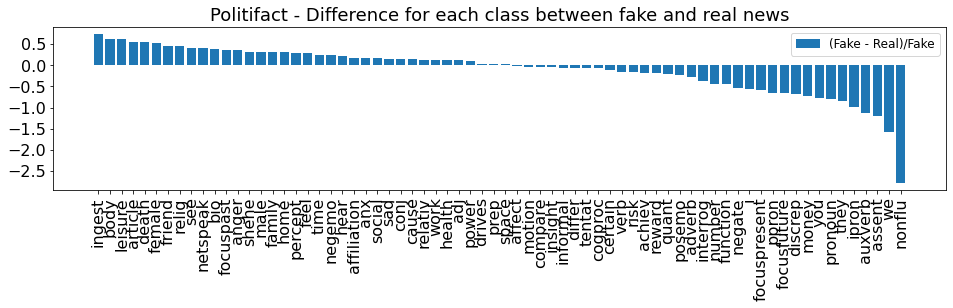

In [52]:
title = "Politifact - Difference for each class between fake and real news"
plot_difference_graph(politifact_list, politifact_real_liwc, politifact_fake_liwc, title, "politifact.pdf") 

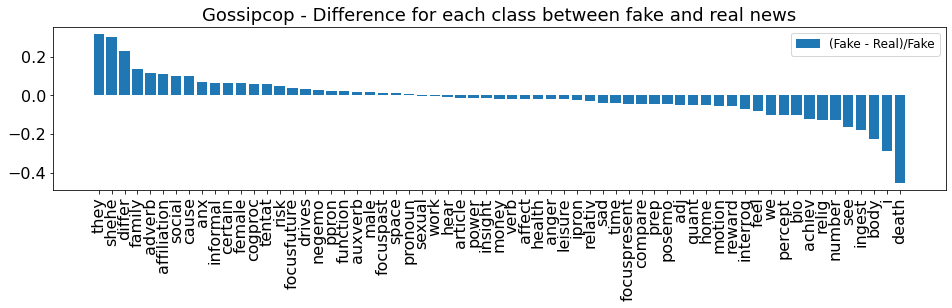

In [53]:
title = "Gossipcop - Difference for each class between fake and real news"
plot_difference_graph(gossipcop_list, gossipcop_real_liwc, gossipcop_fake_liwc, title, "gossipcop.pdf") 

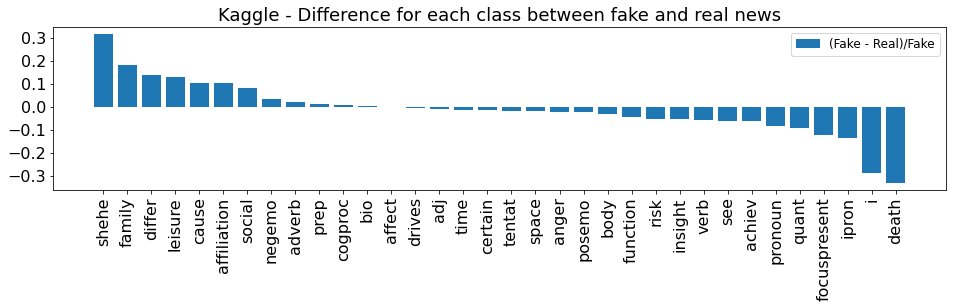

In [54]:
title = "Kaggle - Difference for each class between fake and real news"
plot_difference_graph(kaggle_list, kaggle_real_liwc, kaggle_fake_liwc, title, "kaggle.pdf") 

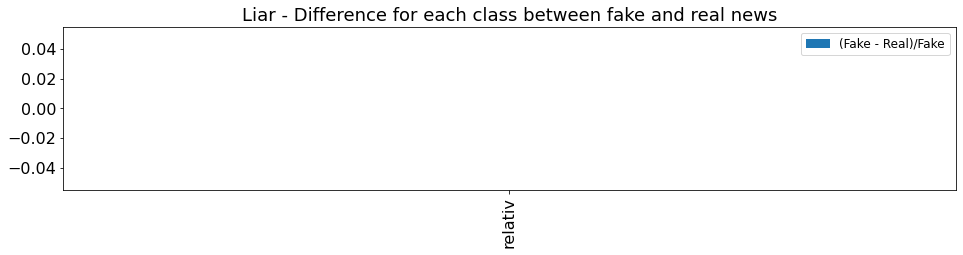

In [55]:
title = "Liar - Difference for each class between fake and real news"
plot_difference_graph(liar_list, liar_real_liwc, liar_fake_liwc, title, "liar.pdf") 

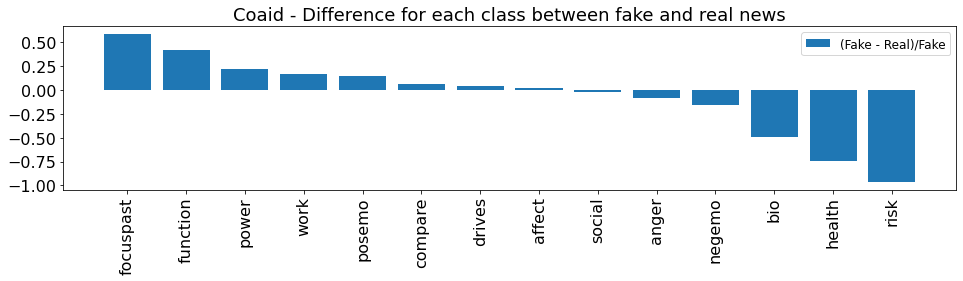

In [56]:
title = "Coaid - Difference for each class between fake and real news"
plot_difference_graph(coaid_list, coaid_real_liwc, coaid_fake_liwc, title, "coaid.pdf") 

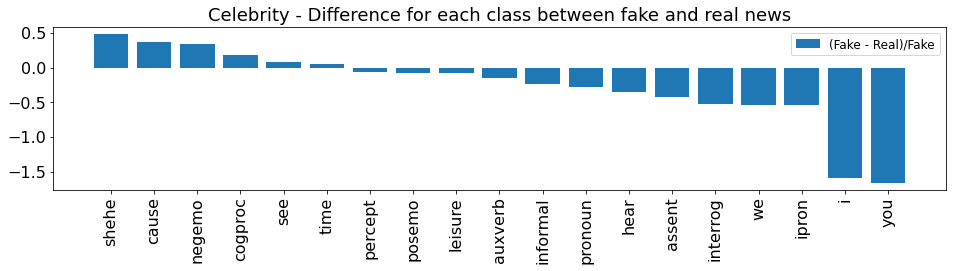

In [57]:
title = "Celebrity - Difference for each class between fake and real news"
plot_difference_graph(celebrity_list, celebrity_real_liwc, celebrity_fake_liwc, title, "celebrity.pdf") 

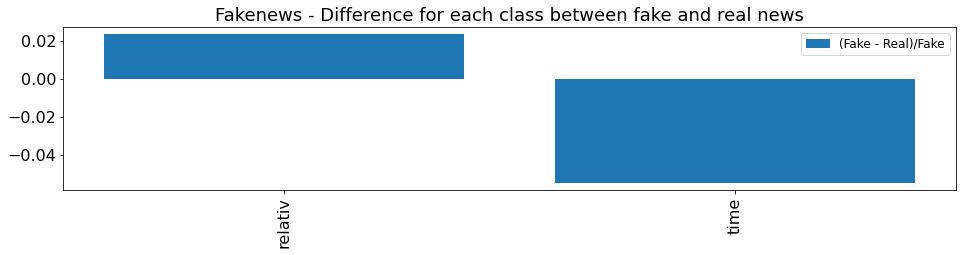

In [58]:
title = "Fakenews - Difference for each class between fake and real news"
plot_difference_graph(fakenews_list, fakenews_real_liwc, fakenews_fake_liwc, title, "fakenews.pdf") 